In [23]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import joblib

from sklearn.preprocessing import StandardScaler

from dotenv import load_dotenv

load_dotenv()
mpl.rcParams['figure.figsize'] = (12, 10)

In [24]:
# load tf model and scaler

model = tf.keras.models.load_model('model/ann_model')

scaler_filename = os.getenv("SCALER_FILENAME")
sc = joblib.load(scaler_filename)


In [25]:
# drop colomn
def dropColomn(df, col):
    try:
        df = df.drop(col,1)
    except:
        print('colomn {0} not found'.format(col))
    return df

# split dataframe to feature target numpy array
def split_feature_label(df):
    return df.iloc[:, :-1].values, df.iloc[:, -1].values

# processing testing dataset

# import dataset
test_df = pd.read_csv(os.getcwd()+'/datasets/testing.csv')
# drop colomn id
test_df = dropColomn(test_df, 'id')

# split features and labels
x_test, y_test = split_feature_label(test_df)

print('shape of testing feature: {0}'.format(x_test.shape))
print('shape of testing labels: {0}'.format(y_test.shape))

shape of testing feature: (542, 14)
shape of testing labels: (542,)


In [26]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions >= p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): {0}, with percentage : {1}'.format(cm[0][0], cm[0][0]/len(labels)))
    print('Legitimate Transactions Incorrectly Detected (False Positives): {0}, with percentage : {1}'.format(cm[0][1], cm[0][1]/len(labels)))
    print('Fraudulent Transactions Missed (False Negatives): {0}, with percentage : {1}'.format(cm[1][0], cm[1][0]/len(labels)))
    print('Fraudulent Transactions Detected (True Positives): {0}, with percentage : {1}'.format(cm[1][1], cm[1][1]/len(labels)))
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

    print('Accuracy : ', accuracy_score(labels, predictions > p))

[[0.68753183 0.        ]
 [0.27569282 0.        ]
 [0.47418833 0.        ]
 ...
 [0.34706211 0.        ]
 [0.33781832 1.        ]
 [0.9338513  1.        ]]
Legitimate Transactions Detected (True Negatives): 364, with percentage : 0.6715867158671587
Legitimate Transactions Incorrectly Detected (False Positives): 96, with percentage : 0.17712177121771217
Fraudulent Transactions Missed (False Negatives): 47, with percentage : 0.08671586715867159
Fraudulent Transactions Detected (True Positives): 35, with percentage : 0.06457564575645756
Total Fraudulent Transactions:  82
Accuracy :  0.7361623616236163


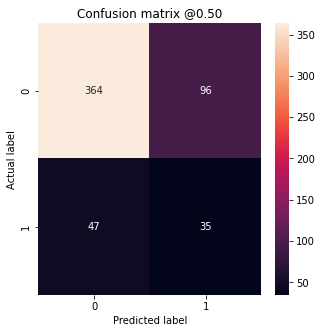

In [27]:
x_test = sc.transform(x_test)
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
plot_cm(y_test, y_pred)